# Study of algorithms for computing a lower bound set

## Packages required 

In [1]:
using JuMP, GLPK, MathOptInterface
import MultiObjectiveAlgorithms as MOA
using Printf, PyPlot

## Primitives provided for dealing with a 2SPA (bi-objective Set Partitioning Problem)


A study of algorithms for computing a lower bound set -------

  verbose.....: yes
  graphics....: yes
  exact.......: yes
  showX.......: yes
  experiment..: no


-) Activate the required packages

  Done


0) instance and characteristics 

  instance = SPA/instances/biodidactic5.txt
  nbvar    = 8
  nbctr    = 4


1) compute the range values of objectives with 0≤x≤1
  GLPK  Lexicographic  Con  0
  cardSN = 2
    1: z=[    14.00,    48.00] | x= Number[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0]  nbOne=3  nbFrac=0  
    2: z=[    21.00,     4.00] | x= Number[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0]  nbOne=2  nbFrac=0  
  nbVar = 8  moyNbFrac = 0.0 ⇒ 0.0%
  Elapsed time: 4.41s 

 
  f1_min=   14.00 ↔ f1_max=   21.00 (Δ=7.00) 
  f2_min=    4.00 ↔ f2_max=   48.00 (Δ=44.00) 


2) compute Y_N with ϵ-constraint method and x∈{0,1}
  GLPK  EpsilonConstraint  Bin  0
  cardSN = 5
    1: z=[    14,    48] | x= Number[0, 0, 1, 0, 0, 1, 1, 0]  nbOne=3  nbFrac=0  
    2: z=[    16,    39] | x= Number[0,

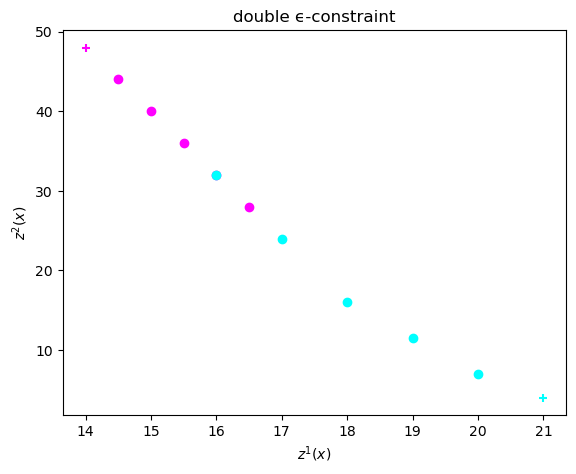

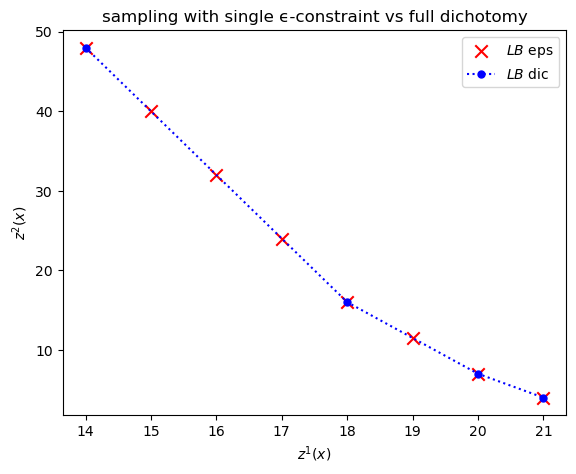

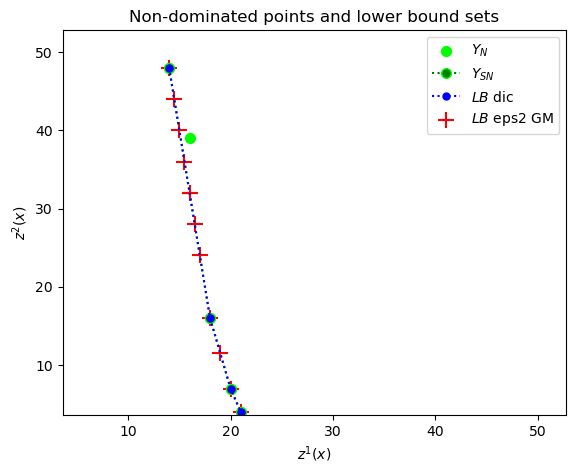

In [2]:
include("src/main.jl")

**`parse2SPA(fname)`**:

Parse a 2SPA instance from a file. 

Return:
- $C$ and $A$

**`load2SPA(fname)`**: 

Create (load) a 2SPA model with JuMP/MOA from a instance file,  where all variables are binary. 

Return:
- a JuMP/MOA model

**`solve2SPA(model2SPA, solverMIP, methodMOA, varType, nbPoints)`**:

Compute $S_N$ for a 2SPA (JuMP/MOA model) for methods and options selected

Parameters:
- model2SPA: a JuMP/MOA model of a 2SPA problem
- solverMIP: $\texttt{:GLPK}$ or $\texttt{:Gurobi}$
- methodMOA: $\texttt{:Lexicographic}$ or $\texttt{:EpsilonConstraint}$ or $\texttt{:Dichotomy}$
- varType: $\texttt{:Bin}$ or $\texttt{:Con}$
- nbPoints: (optional parameter); all the points (if not set) or the number of points to compute (if set)

Return:
- $S_N$, a set of non-dominated points
- $S_E$, a set of efficient solutions

-----

## Variables to configure the output

In [3]:
global verbose    = true
global graphic    = true
global exact      = true
global showX      = false
global experiment = false

false

## Example of a run

In [4]:
target = "SPA/instances" # path toward the folder containing the files

"SPA/instances"

In [5]:
fname = "sppnw40.txt" # numerical instances to perform

"sppnw40.txt"

In [6]:
m2SPA = load2SPA(target * "/bio" * fname)

A JuMP Model
Minimization problem with:
Variables: 404
Objective function type: Vector{AffExpr}
`AffExpr`-in-`MathOptInterface.EqualTo{Float64}`: 19 constraints
`VariableRef`-in-`MathOptInterface.ZeroOne`: 404 constraints
Model mode: AUTOMATIC
CachingOptimizer state: NO_OPTIMIZER
Solver name: No optimizer attached.
Names registered in the model: obj1, obj2, x

In [7]:
println("  nbvar    = ",num_variables(m2SPA))
println("  nbctr    = ",num_constraints(m2SPA, AffExpr, MathOptInterface.EqualTo{Float64})) 

  nbvar    = 404
  nbctr    = 19


### 1) Compute the range values of objectives with $0\le x \le 1$

In [8]:
YRL,XRL = solve2SPA(m2SPA, :GLPK, :Lexicographic, :Con)

  GLPK  Lexicographic  Con  0
  cardSN = 2
    1: z=[ 10658.25, 14733.75] | nbOne=0  nbFrac=9  
    2: z=[ 17115.90,  7146.90] | nbOne=0  nbFrac=12  
  nbVar = 404  moyNbFrac = 10.5 ⇒ 2.6%
  Elapsed time: 0.018s 

 


(Number[10658.249999999998 17115.899999999994; 14733.750000000353 7146.9], Array{Number}[[0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.5, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0.0, 0.29999999999999816, 0.0, 0.09999999999999806, 0.0, 0.6, 0.0, 0.0, 3.789561257387201e-15, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])

In [9]:
minf1RL, maxf2RL = YRL[1,1], YRL[2,1]
maxf1RL, minf2RL = YRL[1,2], YRL[2,2]

@printf("  f1_min=%8.2f ↔ f1_max=%8.2f (Δ=%.2f) \n",minf1RL, maxf1RL, maxf1RL-minf1RL)
@printf("  f2_min=%8.2f ↔ f2_max=%8.2f (Δ=%.2f) \n",minf2RL, maxf2RL, maxf2RL-minf2RL)

  f1_min=10658.25 ↔ f1_max=17115.90 (Δ=6457.65) 
  f2_min= 7146.90 ↔ f2_max=14733.75 (Δ=7586.85) 


###  2) Compute $Y_N$ with $\epsilon$-constraint method and $x\in\{0,1\}$

In [10]:
YN,XE = solve2SPA(m2SPA, :GLPK, :EpsilonConstraint, :Bin)

  GLPK  EpsilonConstraint  Bin  0
  cardSN = 10
    1: z=[ 10809, 14448] | nbOne=4  nbFrac=0  
    2: z=[ 10848, 13800] | nbOne=4  nbFrac=0  
    3: z=[ 11016, 12834] | nbOne=4  nbFrac=0  
    4: z=[ 11172, 11004] | nbOne=4  nbFrac=0  
    5: z=[ 11199,  9342] | nbOne=4  nbFrac=0  
    6: z=[ 12561,  9150] | nbOne=4  nbFrac=0  
    7: z=[ 14799,  9078] | nbOne=5  nbFrac=0  
    8: z=[ 14850,  8910] | nbOne=4  nbFrac=0  
    9: z=[ 16674,  8775] | nbOne=5  nbFrac=0  
   10: z=[ 18087,  8589] | nbOne=5  nbFrac=0  
  nbVar = 404  moyNbFrac = 0.0 ⇒ 0.0%
  Elapsed time: 0.081s 

 


(Number[10809 10848 … 16674 18087; 14448 13800 … 8775 8589], Array{Number}[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 1, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0] … [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0, 1, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

### 3) compute $Y_{SN}$ with dichotomic method and $x\in\{0,1\}$

In [11]:
YSN,XSE = solve2SPA(m2SPA, :GLPK, :Dichotomy, :Bin)

  GLPK  Dichotomy  Bin  0
  cardSN = 6
    1: z=[ 10809, 14448] | nbOne=4  nbFrac=0  
    2: z=[ 10848, 13800] | nbOne=4  nbFrac=0  
    3: z=[ 11199,  9342] | nbOne=4  nbFrac=0  
    4: z=[ 12561,  9150] | nbOne=4  nbFrac=0  
    5: z=[ 14850,  8910] | nbOne=4  nbFrac=0  
    6: z=[ 18087,  8589] | nbOne=5  nbFrac=0  
  nbVar = 404  moyNbFrac = 0.0 ⇒ 0.0%
  Elapsed time: 0.04s 

 


(Number[10809 10848 … 14850 18087; 14448 13800 … 8910 8589], Array{Number}[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 1, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0] … [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0, 1, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

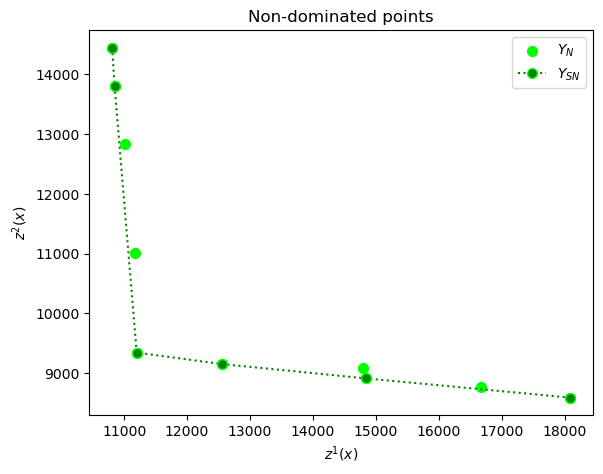

PyObject <matplotlib.legend.Legend object at 0x2abb33820>

In [12]:
figure("Objective Space Y",figsize=(6.5,5))
title("Non-dominated points")
xlabel(L"z^1(x)")
ylabel(L"z^2(x)")
scatter(YN[1,:], YN[2,:], c="lime", s=50, label=L"$Y_N$")
plot(YSN[1,:], YSN[2,:], c="green", mec="lime", marker="o", linestyle="dotted", label=L"$Y_{SN}$", markersize=7) 
legend()

### 4) compute $LB(Y_N)$ with dichotomic method and $0\le x \le 1$ 

In [13]:
YLD,XLD = solve2SPA(m2SPA, :GLPK, :Dichotomy, :Con) 

  GLPK  Dichotomy  Con  0
  cardSN = 16
    1: z=[ 10658.25, 14733.75] | nbOne=0  nbFrac=9  
    2: z=[ 10665.75, 13303.50] | nbOne=0  nbFrac=9  
    3: z=[ 10675.50, 12972.00] | nbOne=1  nbFrac=7  
    4: z=[ 10747.00, 11596.00] | nbOne=1  nbFrac=7  
    5: z=[ 10829.00, 10616.00] | nbOne=1  nbFrac=8  
    6: z=[ 10898.00, 10078.00] | nbOne=0  nbFrac=9  
    7: z=[ 10921.50,  9933.00] | nbOne=1  nbFrac=6  
    8: z=[ 10978.50,  9652.50] | nbOne=0  nbFrac=7  
    9: z=[ 11156.00,  8846.00] | nbOne=1  nbFrac=7  
   10: z=[ 11260.00,  8432.00] | nbOne=1  nbFrac=7  
   11: z=[ 12330.00,  7966.80] | nbOne=0  nbFrac=9  
   12: z=[ 13428.00,  7719.00] | nbOne=0  nbFrac=11  
   13: z=[ 15245.40,  7401.00] | nbOne=0  nbFrac=12  
   14: z=[ 16144.71,  7265.57] | nbOne=0  nbFrac=12  
   15: z=[ 16841.40,  7175.40] | nbOne=0  nbFrac=11  
   16: z=[ 17115.90,  7146.90] | nbOne=0  nbFrac=12  
  nbVar = 404  moyNbFrac = 8.9375 ⇒ 2.21%
  Elapsed time: 0.029s 

 


(Number[10658.250000000004 10665.750000000005 … 16841.399999999998 17115.900000000005; 14733.750000000011 13303.500000000011 … 7175.4 7146.900000000001], Array{Number}[[0.0, 0.0, 0.0, 0.0, 0.0, 0.24999999999999956, 0.0, 0.5000000000000007, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0.0, 0.0, 0.0, 0.0, 0.0, 0.24999999999999944, 0.0, 0.5000000000000001, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] … [0.0, 0.20000000000000026, 0.0, -2.7755575615628914e-17, 0.0, 0.5999999999999999, 0.0, 0.0, 0.19999999999999984, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0.0, 0.3000000000000011, 0.0, 0.09999999999999973, 0.0, 0.5999999999999999, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])

### 5) probe $LB(Y_N)$ with ϵ-constraint method and $0\le x \le 1$

In [14]:
sizeYN = size(YN,2)
nbProbe = 2^ceil(Int,log2(sizeYN))

16

In [15]:
YLϵ,XLϵ = solve2SPA(m2SPA, :GLPK, :EpsilonConstraint, :Con, nbPoints=nbProbe)

  GLPK  EpsilonConstraint  Con  16
  cardSN = 16
    1: z=[ 10658.25, 14733.75] | nbOne=0  nbFrac=9  
    2: z=[ 11088.76,  9151.52] | nbOne=0  nbFrac=9  
    3: z=[ 11519.27,  8319.28] | nbOne=0  nbFrac=11  
    4: z=[ 11949.78,  8132.11] | nbOne=0  nbFrac=11  
    5: z=[ 12380.29,  7955.45] | nbOne=0  nbFrac=12  
    6: z=[ 12810.80,  7858.29] | nbOne=0  nbFrac=12  
    7: z=[ 13241.31,  7761.13] | nbOne=0  nbFrac=12  
    8: z=[ 13671.82,  7676.34] | nbOne=0  nbFrac=13  
    9: z=[ 14102.33,  7601.01] | nbOne=0  nbFrac=13  
   10: z=[ 14532.84,  7525.68] | nbOne=0  nbFrac=13  
   11: z=[ 14963.35,  7450.35] | nbOne=0  nbFrac=13  
   12: z=[ 15393.86,  7378.64] | nbOne=0  nbFrac=13  
   13: z=[ 15824.37,  7313.81] | nbOne=0  nbFrac=13  
   14: z=[ 16254.88,  7251.31] | nbOne=0  nbFrac=13  
   15: z=[ 16685.39,  7195.59] | nbOne=0  nbFrac=13  
   16: z=[ 17115.90,  7146.90] | nbOne=0  nbFrac=12  
  nbVar = 404  moyNbFrac = 12.0 ⇒ 2.97%
  Elapsed time: 0.025s 

 


(Number[10658.249999999962 11088.75999999996 … 16685.389999999996 17115.899999999998; 14733.7500000086 9151.515830986093 … 7195.592239173229 7146.9], Array{Number}[[0.0, 0.0, 0.0, 0.0, 0.0, 0.25000000000000105, 0.0, 0.4999999999999997, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0.0, 0.0, 0.0, 0.0, 0.0, 0.39646948356811107, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] … [0.0, 0.2191941437007877, 0.0, 0.03199023950131274, 0.0, 0.5936019520997374, 0.0, 0.0, 0.1552136646981624, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] [0.0, 0.3, 0.0, 0.10000000000000019, 0.0, 0.5999999999999998, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])

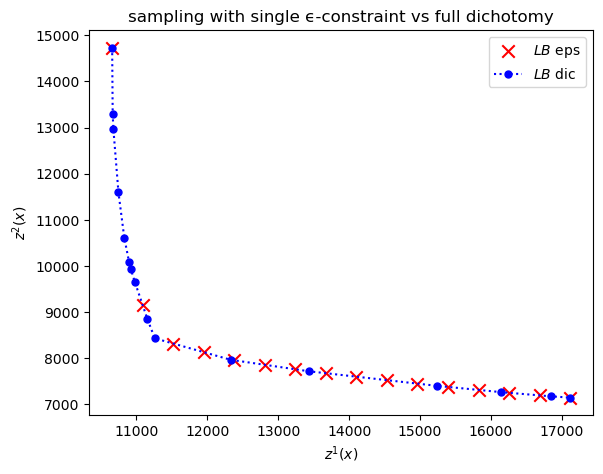

PyObject <matplotlib.legend.Legend object at 0x2abba7430>

In [16]:
figure("Generators",figsize=(6.5,5))
title("sampling with single ϵ-constraint vs full dichotomy")
xlabel(L"z^1(x)")
ylabel(L"z^2(x)")
scatter(YLϵ[1,:], YLϵ[2,:], c="red", marker="x", s=80, label=L"$LB$ eps") 
plot(YLD[1,:], YLD[2,:], c="blue", marker="o", linestyle="dotted", label=L"$LB$ dic", markersize=5) 
legend() 

-----

## Close look on the double $\epsilon$-constraint algorithm implemented in Gravity Machine

**`ϵConstraintSPAdouble`**

Compute generators using a double $\epsilon$-contrainte method (without calling MOA)

Parameters:
- C
- A 
- tailleSampling

Return:
- $\texttt{SN1}$, $\texttt{SN2}$, a set of non-dominated points

## Example of a run

In [17]:
C, A = parse2SPA(target * "/bio" * fname) 

([5268 5445 … 2112 5388; 4923 2913 … 4965 3279], [1 1 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 1 1])

  GLPK  doubleEpsilonConstraint  Con
  z1_LP: [ 10658.25 , 14733.75 ]  nbOne=0  nbFrac=9  
  z2_LP: [ 17115.90 ,  7146.90 ]  nbOne=0  nbFrac=12  
  z1  2 : ϵ = 13892.00  [ 10662.66 , 13892.00 ]  nbOne=0  nbFrac=10  
  z2  2 : ϵ = 16399.00  [ 16399.00 ,  7232.66 ]  nbOne=0  nbFrac=13  
  z1  3 : ϵ = 13050.00  [ 10673.21 , 13050.00 ]  nbOne=0  nbFrac=10  
  z2  3 : ϵ = 15682.00  [ 15682.00 ,  7335.25 ]  nbOne=0  nbFrac=13  
  z1  4 : ϵ = 12208.00  [ 10715.20 , 12208.00 ]  nbOne=1  nbFrac=9  
  z2  4 : ϵ = 14965.00  [ 14965.00 ,  7450.06 ]  nbOne=0  nbFrac=13  
  z1  5 : ϵ = 11366.00  [ 10766.24 , 11366.00 ]  nbOne=1  nbFrac=9  
  z2  5 : ϵ = 14248.00  [ 14248.00 ,  7575.52 ]  nbOne=0  nbFrac=13  
  z1  6 : ϵ = 10524.00  [ 10840.80 , 10524.00 ]  nbOne=0  nbFrac=10  
  z2  6 : ϵ = 13531.00  [ 13531.00 ,  7700.98 ]  nbOne=0  nbFrac=13  
  z1  7 : ϵ =  9682.00  [ 10972.51 ,  9682.00 ]  nbOne=0  nbFrac=10  
  z2  7 : ϵ = 12814.00  [ 12814.00 ,  7857.57 ]  nbOne=0  nbFrac=12  
  z1  8 : ϵ =  8

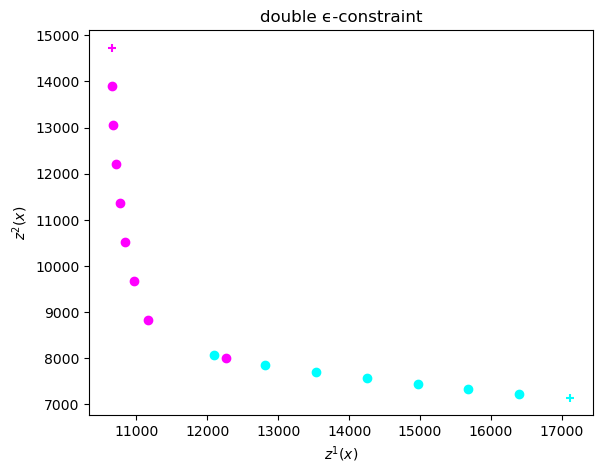

(Number[10658.25, 10662.66, 16399.0, 10673.21, 15682.0, 10715.2, 14965.0, 10766.24, 14248.0, 10840.8, 13531.0, 10972.51, 12814.0, 11157.51, 12097.0, 12258.24, 17115.9], Number[14733.75, 13892.0, 7232.66, 13050.0, 7335.25, 12208.0, 7450.06, 11366.0, 7575.52, 10524.0, 7700.98, 9682.0, 7857.57, 8840.0, 8068.1, 7998.0, 7146.9])

In [18]:
nbProbe = 12 
SNd1, SNd2 = ϵConstraintSPAdouble(C, A, nbProbe)

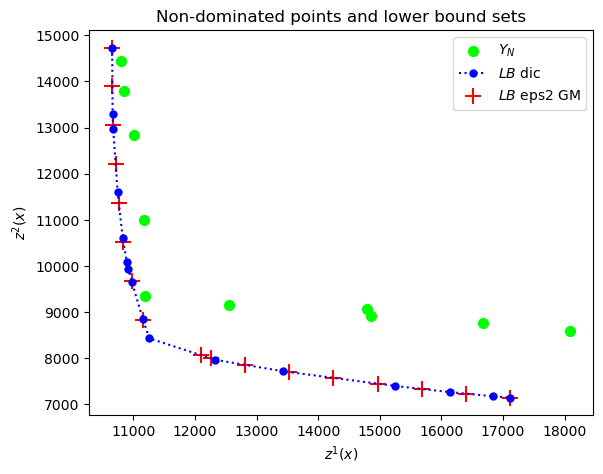

PyObject <matplotlib.legend.Legend object at 0x2ac91cac0>

In [19]:
figure("Generators",figsize=(6.5,5))
title("Non-dominated points and lower bound sets")
xlabel(L"z^1(x)")
ylabel(L"z^2(x)")
scatter(YN[1,:], YN[2,:], c="lime", s=50, label=L"$Y_N$") 
plot(YLD[1,:], YLD[2,:], c="blue", marker="o", linestyle="dotted", label=L"$LB$ dic", markersize=5) 
scatter(SNd1, SNd2, c="red", marker="+", s=140, label=L"$LB$ eps2 GM")
legend()

# Others runs

In [20]:
global verbose    = false
global graphic    = false
global exact      = true
global showX      = false
global experiment = false

false

  GLPK  EpsilonConstraint  Bin  0
  Elapsed time: 0.567s 

 
  GLPK  Dichotomy  Con  0
  Elapsed time: 0.113s 

 
  GLPK  doubleEpsilonConstraint  Con
  Elapsed time: 0.038s 
 


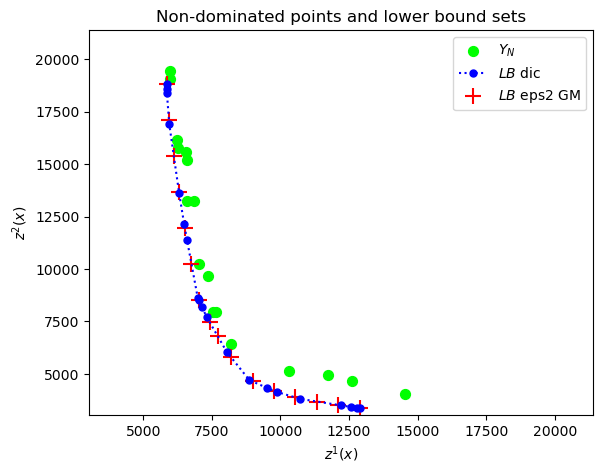

PyObject <matplotlib.legend.Legend object at 0x2ac9c5570>

In [21]:
fname = "sppnw25.txt"
m2SPA = load2SPA(target * "/bio" * fname)

YN,XE = solve2SPA(m2SPA, :GLPK, :EpsilonConstraint, :Bin)
YLD,XLD = solve2SPA(m2SPA, :GLPK, :Dichotomy, :Con) 

C, A = parse2SPA(target * "/bio" * fname) 
nbProbe = 12 
YLEd1, YLEd2 = ϵConstraintSPAdouble(C, A, nbProbe)

displayRes(fname,YN, YLD, YLEd1, YLEd2)

  GLPK  EpsilonConstraint  Bin  0
  Elapsed time: 1.911s 

 
  GLPK  Dichotomy  Con  0
  Elapsed time: 0.308s 

 
  GLPK  doubleEpsilonConstraint  Con
  Elapsed time: 0.073s 
 


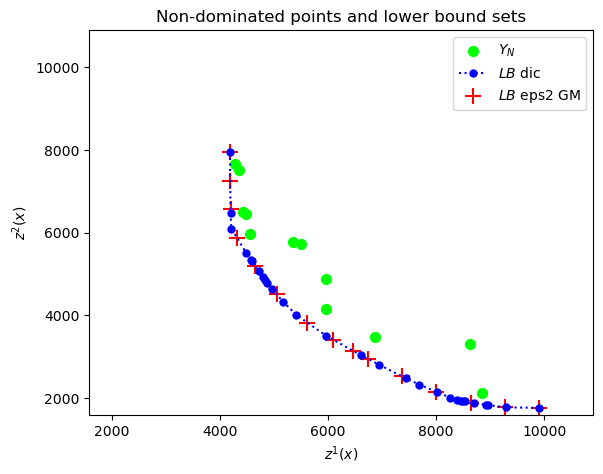

PyObject <matplotlib.legend.Legend object at 0x2acea8640>

In [22]:
fname = "sppnw29.txt"
m2SPA = load2SPA(target * "/bio" * fname)

YN,XE = solve2SPA(m2SPA, :GLPK, :EpsilonConstraint, :Bin)
YLD,XLD = solve2SPA(m2SPA, :GLPK, :Dichotomy, :Con) 

C, A = parse2SPA(target * "/bio" * fname) 
nbProbe = 12 
YLEd1, YLEd2 = ϵConstraintSPAdouble(C, A, nbProbe)

displayRes(fname,YN, YLD, YLEd1, YLEd2)

# Numerical experiment

In [23]:
global verbose    = false
global graphic    = false
global exact      = false
global showX      = false
global experiment = true

true

In [ ]:
numericalExperiment(target)

pwd = /Users/xavierg/Desktop/generators/SPA/instances
fname = biodidactic3.txt
fname = biodidactic5.txt
fname = biosppaa01.txt
fname = biosppaa02.txt
fname = biosppaa03.txt
fname = biosppaa05.txt
fname = biosppnw01.txt
fname = biosppnw02.txt
fname = biosppnw03.txt
fname = biosppnw04.txt
fname = biosppnw05.txt
fname = biosppnw06.txt
fname = biosppnw07.txt
fname = biosppnw08.txt
fname = biosppnw09.txt
fname = biosppnw10.txt
fname = biosppnw11.txt
fname = biosppnw12.txt
fname = biosppnw13.txt
fname = biosppnw14.txt
fname = biosppnw15.txt
fname = biosppnw16.txt
fname = biosppnw17.txt
fname = biosppnw18.txt
fname = biosppnw19.txt
fname = biosppnw20.txt
fname = biosppnw21.txt
fname = biosppnw22.txt
fname = biosppnw23.txt
fname = biosppnw24.txt
fname = biosppnw25.txt
fname = biosppnw26.txt
fname = biosppnw27.txt
fname = biosppnw28.txt
fname = biosppnw29.txt
fname = biosppnw30.txt
fname = biosppnw31.txt
fname = biosppnw32.txt
fname = biosppnw33.txt
fname = biosppnw34.txt
fname = biosppnw35.txt

 
5) probe LB(Y_N) with ϵ-constraint method and 0≤x≤1
  GLPK  EpsilonConstraint  Con  16
  Elapsed time: 3.984s 

 
6) probe LB(Y_N) with ϵ-constraint method (homemade), ceil and 0≤x≤1
  Elapsed time: 1.995s 
 

7) probe LB(Y_N) with a double ϵ-constraint method (homemade), ceil and 0≤x≤1
  GLPK  doubleEpsilonConstraint  Con
  Elapsed time: 2.856s 
 
Elapsed time for biosppnw03.txt : 40.81087899208069 (s)

0) instance and characteristics 

  instance = SPA/instances/biosppnw04.txt
  nbvar    = 87482
  nbctr    = 36


1) compute the range values of objectives with 0≤x≤1
  GLPK  Lexicographic  Con  0
  Elapsed time: 4.135s 

 
2) compute Y_N with ϵ-constraint method and x∈{0,1}
3) compute Y_SN with dichotomic method and x∈{0,1}
4) compute LB(Y_N) with dichotomic method and 0≤x≤1
  GLPK  Dichotomy  Con  0
  Elapsed time: 28.572s 

 
5) probe LB(Y_N) with ϵ-constraint method and 0≤x≤1
  GLPK  EpsilonConstraint  Con  16
  Elapsed time: 7.058s 

 
6) probe LB(Y_N) with ϵ-constraint method (h

 
5) probe LB(Y_N) with ϵ-constraint method and 0≤x≤1
  GLPK  EpsilonConstraint  Con  16
  Elapsed time: 1.191s 

 
6) probe LB(Y_N) with ϵ-constraint method (homemade), ceil and 0≤x≤1
  Elapsed time: 0.529s 
 

7) probe LB(Y_N) with a double ϵ-constraint method (homemade), ceil and 0≤x≤1
  GLPK  doubleEpsilonConstraint  Con
  Elapsed time: 0.773s 
 
Elapsed time for biosppnw13.txt : 6.584173917770386 (s)

0) instance and characteristics 

  instance = SPA/instances/biosppnw14.txt
  nbvar    = 123409
  nbctr    = 73


1) compute the range values of objectives with 0≤x≤1
  GLPK  Lexicographic  Con  0
  Elapsed time: 6.461s 

 
2) compute Y_N with ϵ-constraint method and x∈{0,1}
3) compute Y_SN with dichotomic method and x∈{0,1}
4) compute LB(Y_N) with dichotomic method and 0≤x≤1
  GLPK  Dichotomy  Con  0
  Elapsed time: 83.419s 

 
5) probe LB(Y_N) with ϵ-constraint method and 0≤x≤1
  GLPK  EpsilonConstraint  Con  16
  Elapsed time: 12.103s 

 
6) probe LB(Y_N) with ϵ-constraint method 